# Cournot Model

In this assignment we will be looking at a Cournot duopoly model. We will see how different marginal cost will effect firms in the model.

Imports and set magics:

In [54]:
from types import SimpleNamespace
import numpy as np
import scipy as optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

from snorrieg import CournotModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

The Cournot duopoly model describes how two firms in a market compete on output quantity rather than prices.
#### Assumptions:
* The market only consists of these two firms.
* The firms producing homogeneous product.
* Each firm maximizes its own profit, regarding the other firm output level.
* Firms are rational and choose quantity simultaneosly.
* No collusion.
* Fixed marginal costs.

Firm 1 produces the output $q_1$ and firm 2 produces the output $q_2$.
The market price is $P(Q)=a-Q$ where $Q=q_1 + q_2$, or the total quantity in the market. The firms have the same marginal cost c, where $0\le c<a$.

Profit functions for the firms:

$\pi_1(q_1,q_2)= P(q_1+q_2)q_1 - cq_1$

$\pi_2(q_1,q_2)= P(q_1+q_2)q_2 - cq_2$

or

$\pi_1(q_1,q_2)= (a-q_1-q_2-c)q_1$

$\pi_2(q_1,q_2)= (a-q_1-q_2-c)q_2$


To solve the model we have to finnd the best-response functions for the firms to find the Nash Equilibrium. We take the first-order-condition for each firm with respect to their quantity and get:

Firm 1: $a - 2q_1-q_2-c=0 => q_1(q_2)=\frac{a-c-q_2}{2}$

Firm 2: $a-q_1-2q_2-c=0 => q_2(q_1)=\frac{a-c-q_1}{2}$

Which are the best-response functions.

For both firms, we get get the best response quantity (equilibrium quantity for the other firm is marked with '*') :

$q_1=\frac{a-c-q^*_2}{2}$

$q_2=\frac{a-c-q^*_1}{2}$



So the Nash Equilibrium is:

$q^*_1=\frac{a-c-q^*_2}{2}$


$q^*_2=\frac{a-c-q^*_1}{2}$

Solving for $q^*_1$ and $q^*_2$:

$q^*_1=q^*_2=\frac{a-c}{3}$

# Symbolic solution

In [44]:
q1, q2, q, a, c = sm.symbols('q_1 q_2 q a c')    # Defining symbols

P = a - q1 -q2  #Inverse demand

profit1 = (P-c)*q1  #Profit functions
profit2 = (P-c)*q2

d_profit1 = sm.diff(profit1, q1)    #FOC for maximizing profit wrt q
d_profit2 = sm.diff(profit2, q2)

response1 = sm.solve([d_profit1], [q1])     #solving the FOC for best response functions
response2 = sm.solve([d_profit2], [q2])

Pofit functions for each firm:

In [34]:
display(profit1)
display(profit2)

q_1*(a - c - q_1 - q_2)

q_2*(a - c - q_1 - q_2)

Best response functions for each firm:

In [41]:
sm.together(response1)

{q_1: (a - c - q_2)/2}

and

In [42]:
sm.together(response2)

{q_2: (a - c - q_1)/2}

Solving for $q^*_1$ and $q^*_2$ gives us:

 $q^*_1 = q^*_2 = (a-c)/3$

# Numerical solution

In [57]:
model = CournotModel(100, 20, 20)

equilibrium = model.find_nash_equilibrium()
print(f"Nash Equilibrium quantities: Firm 1: {equilibrium[0]}, Firm 2: {equilibrium[1]}")


Nash Equilibrium quantities: Firm 1: 26.66666666666667, Firm 2: 26.666666666666664


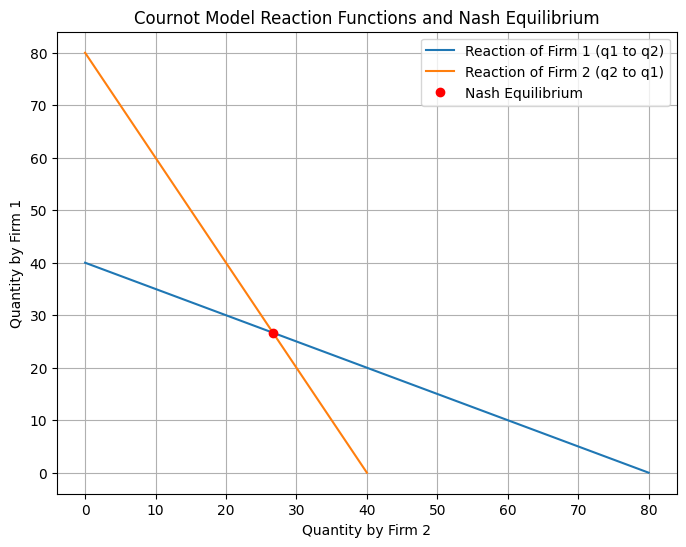

In [58]:
model.plot_model()

Now we wan't to see what happens if one of the assumptions of the Cournot model, that the firms do not have the same marginal cost.

In [61]:
model = CournotModel(100, 20, 35)

equilibrium = model.find_nash_equilibrium()
print(f"Nash Equilibrium quantities: Firm 1: {equilibrium[0]}, Firm 2: {equilibrium[1]}")

Nash Equilibrium quantities: Firm 1: 31.666666666666664, Firm 2: 16.666666666666668


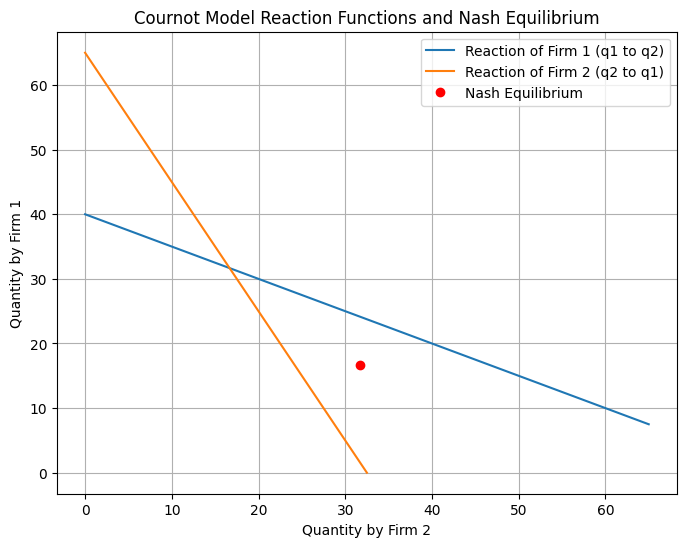

In [62]:
model.plot_model()

We see that there is no Nash Equilibrium here